Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'New Image')

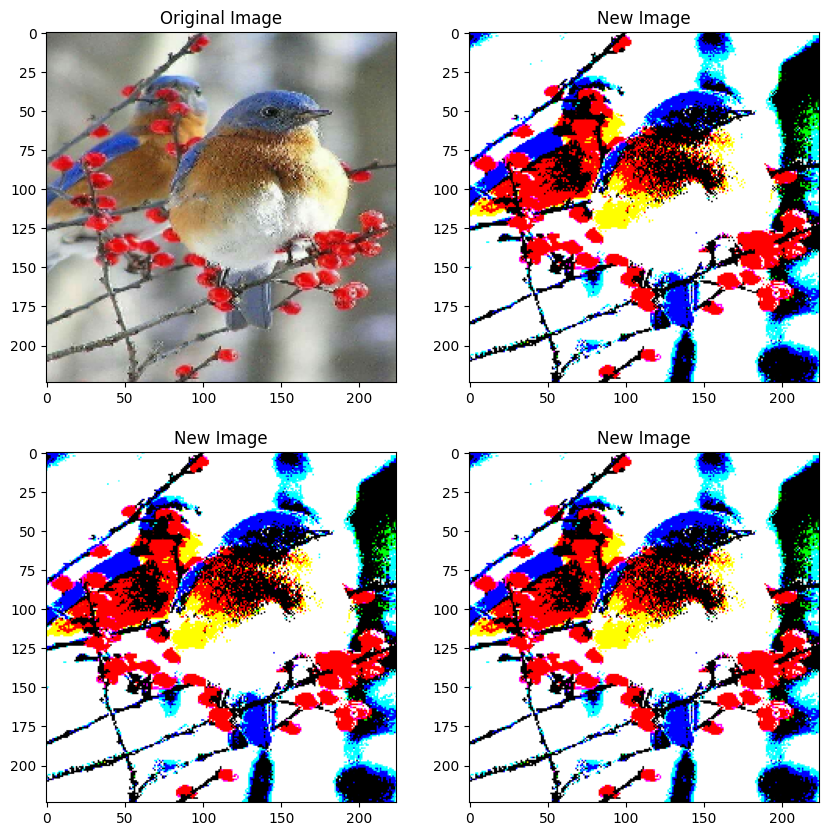

In [22]:
# โค้ดจากข้อ 3.2

# import library
import cv2
import numpy as np
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import Model
from matplotlib import pyplot as plt
from numpy import expand_dims
from scipy import signal 

# โหลด VGG16 Model 
model = VGG16()
# สรุปรวมโครงสร้างและจำนวนพารามิเตอร์ของโมเดล VGG16
model.summary()
# ดึง array ของ weight และ bias ของ VGG16 ใน Layer 1
kernels, biases = model.layers[1].get_weights()
# ดึงโครงสร้างการทำงานทั้งหมดของ VGG16 Model ใน Layer 1 มาแสดง
model.layers[1].get_config()

# อ่านไฟล์ภาพที่ต้องการนำเข้า Model และปรับขนาดของภาพให้ตรงกับขนาด Input ของโมเดล VGG16
img = load_img(f'bird.jpg', target_size=(224, 224))
original = img

img_mean = [123.68, 116.779, 103.939] #BGR

# แปลงภาพเป็น NumPy array
img_array = np.array(img)

# ดึงค่าสีแต่ละ channel ของ img ออกมา
imgB = img_array[:, :, 0]
imgG = img_array[:, :, 1]
imgR = img_array[:, :, 2]

# นำมาคำนวณค่า img - img_mean ของแต่ละ R,G,B
B = imgB - img_mean[0]
G = imgG - img_mean[1]
R = imgR - img_mean[2]

# รวมแต่ละ channel กลับเป็นรูปเหมือนเดิม
new_img = cv2.merge([B, G, R])

# เพิ่ม dimension
img4d = expand_dims(new_img, axis=0)
img4d.shape

fig, axes = plt.subplots(2, 2, figsize=(10, 10))

# แสดงภาพ Original
axes[0,0].imshow(original)
axes[0,0].set_title('Original Image')

# แสดงภาพ new image
axes[0,1].imshow(new_img)
axes[0,1].set_title('New Image')
# แสดงภาพ new image
axes[1,0].imshow(new_img)
axes[1,0].set_title('New Image')
# แสดงภาพ new image
axes[1,1].imshow(new_img)
axes[1,1].set_title('New Image')

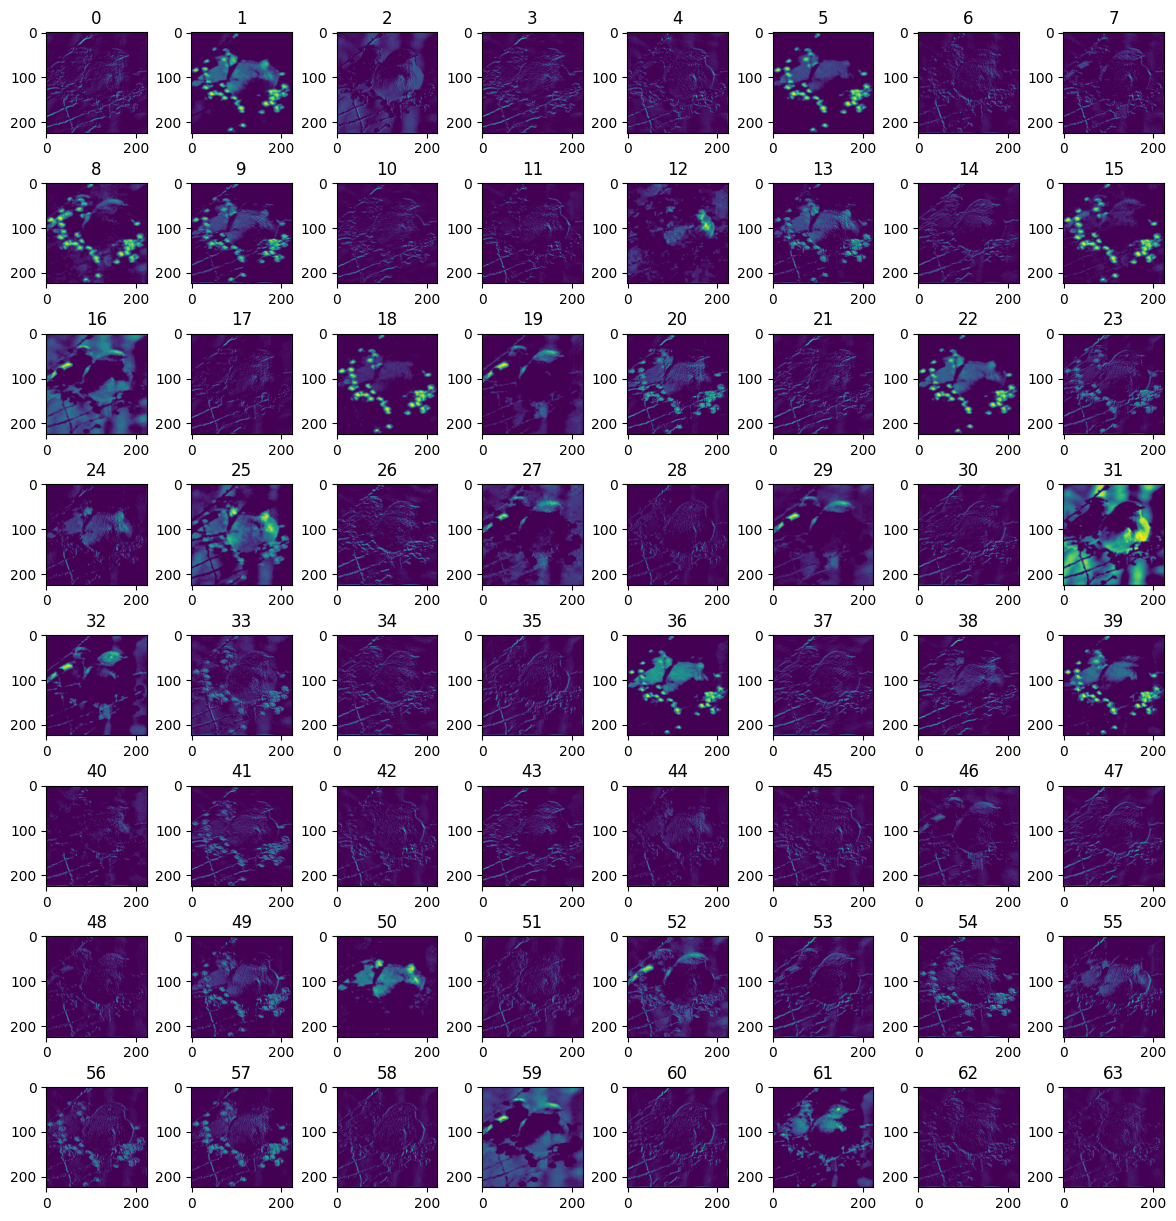

In [20]:
# ข้อ 3.3

# สร้างมาเก็บผลลัพธ์หลังจากทำ convolution 
img_result = np.zeros((224, 224,3))


for i in range(65):
    image_sum = np.zeros((i,224, 224))
    
def relu(x):
    return(np.maximum(0, x))
  
# ลูปเพื่อทำ convolution และ ReLU activation สำหรับแต่ละช่องสี  
for i in range(64):
    # Convolution และสร้างผลลัพธ์สำหรับแต่ละช่องสี
    img_result[: , :, 0] = signal.convolve2d( new_img[ : , : , 0], kernels[: , : , 0, i] , mode='same',boundary='fill', fillvalue=0)
    img_result[: , :, 1] = signal.convolve2d( new_img[ : , : , 1], kernels[: , : , 1, i] , mode='same',boundary='fill', fillvalue=0)
    img_result[: , :, 2] = signal.convolve2d( new_img[ : , : , 2], kernels[: , : , 2, i] , mode='same',boundary='fill', fillvalue=0)
    # สร้าง image_sum และใช้ ReLU activation
    image_sum[i,:,:] = img_result[ : , : ,0] + img_result[ : , : , 1] + img_result[ : , : , 2]
    image_sum[i,:,:] = relu(image_sum[i,:,:])

# รวมผลลัพธ์จากแต่ละช่องสีเพื่อสร้างภาพสีสุดท้าย
imgRGB_sum = cv2.merge([img_result[: , :, 0], img_result[: , :, 1], img_result[: , :, 2]])

# แสดงผลลัพธ์ด้วย subplot
fig, axs = plt.subplots(8,8, figsize=(15, 15), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.001)

axs = axs.ravel()

for i in range(64):

    axs[i].imshow(image_sum[i,:,:],cmap='viridis')
    axs[i].set_title(i)